### Confidence Intervals

For the bikes data set, calculate the 95% confidence intervals for the mean of the windspeed feature using bootstrapping. Create a notebook in which following questions shall be solved:

1. Initialize empty list called sample_means
2. Create a for loop that will loop 10,000 times
3. In each iteration using the pandas method .sample() sample 100 windspeeds with replacement
4. Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list
5. Using sns.displot plot the distribution of the sample_means list
6. Convert sample_means list to pandas Series
7. Using pandas .quantile() calculate the upper (0.975) and lower (0.025) limits of the confidence interval of the sample_means Series

Bonus

Calculate using the z-value formula
Compare to the results of the bootstrapping method

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
df = pd.read_csv('../data/bike_dataset_new.csv',parse_dates=['datetime'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,weekday,day,year,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,1,2011,morning
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,1,2011,morning
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,1,2011,morning
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,1,2011,morning
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,1,2011,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,31,2012,evening
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,31,2012,evening
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,31,2012,night
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,43,22,12,0,31,2012,night


In [4]:
# df['windspeed'].count()

#### 1. Initialize empty list called sample_means

In [5]:
sample_means = []

#### 2. Create a for loop that will loop 10,000 times
#### 3. In each iteration using the pandas method .sample() sample 100 windspeeds with replacement
#### 4. Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list

In [6]:
for i in range(10_000):
    bootstrap_sample = df['windspeed'].sample(n=100,replace=True) 
#   bootstrap_sample = df['windspeed'].sample(frac=0.0057,replace=True) 
#   frac = sample_size / total_size
    sample_means.append(bootstrap_sample.mean())

#### 5. Using sns.displot plot the distribution of the sample_means list

C:\Users\HP\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


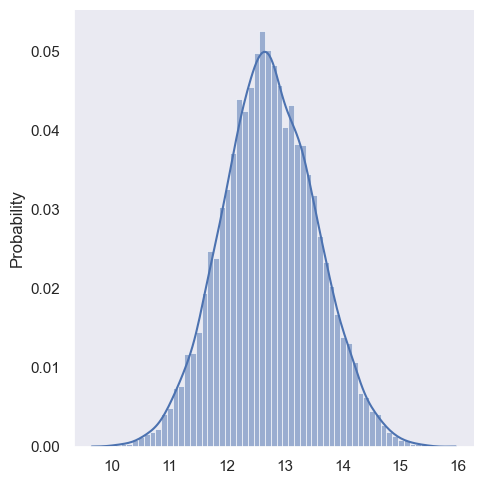

In [7]:
sns.set(style='dark')
sns.displot(sample_means, kde=True, stat="probability");

#### 6. Convert sample_means list to pandas Series

In [8]:
sample_means_series = pd.Series(sample_means)

#### 7. Using pandas .quantile() calculate the upper (0.975) and lower (0.025) limits of the confidence interval of the sample_means Series

In [10]:
cl = 0.975 #set the confidence level to 0.975, which corresponds to a 95% confidence interval

lower_quantile = (1-cl)/2  #this will be 0.025 (half of the significance level)

upper_quantile = cl + ((1-cl)/2) # this will also be 0.975

lower_limit = sample_means_series.quantile(lower_quantile)

upper_limit = sample_means_series.quantile(upper_quantile)

print(f'The Confidence Interval of the average windspeed is between {lower_limit} and {upper_limit}')

The Confidence Interval of the average windspeed is between 10.9502111625 and 14.570222837499996


In [11]:
#for sample = 10,000
sample_means2 = []
for i in range(100_000):
    bootstrap_sample2 = df['windspeed'].sample(n=10000,replace=True) 
    sample_means2.append(bootstrap_sample2.mean())

sample_means_series2 = pd.Series(sample_means2)

cl2 = 0.975

lower_quantile2 = (1-cl2)/2  

upper_quantile2 = cl2 + ((1-cl2)/2)

lower_limit2 = sample_means_series2.quantile(lower_quantile2)

upper_limit2 = sample_means_series2.quantile(upper_quantile2)

print(f'The Confidence Interval of the average windspeed is between {lower_limit2} and {upper_limit2}')

The Confidence Interval of the average windspeed is between 12.5520880995 and 12.920101813499999


#### Bonus - using statistical formula

Calculate using the z-value formula
Compare to the results of the bootstrapping method

In [12]:
# sample mean and standard deviation for windspeed

sample_mean = df['windspeed'].mean()

sample_std = df['windspeed'].std()

print(sample_mean, sample_std)

12.736539622532941 8.196795314376963


In [13]:
# cl = 0.975, then z = 2.17

z = 2.17
n = len(df['windspeed'])

lower_limit_eq = sample_mean - ((z * sample_std) / np.sqrt(n))
upper_limit_eq = sample_mean + ((z * sample_std) / np.sqrt(n))

print(f'Calculated Confidence Interval of the average windspeed is between {lower_limit_eq} and {upper_limit_eq}')


Calculated Confidence Interval of the average windspeed is between 12.601614931415103 and 12.87146431365078


### Comparison

**Bootstrapping method results:** with n=100

- Confidence Interval of the average windspeed is between **11.03061145858586**and **14.450158837500004**

**Bootstrapping method results:** with n=10,000
- Confidence Interval of the average windspeed is between **12.553099146249998** and **12.92241212425**
   
**Statistical formula results:**
    
- Confidence Interval of the average windspeed is between **12.601614931415103** and **12.87146431365078**
  

#### Note

- For small dataset use bootstrapping
- For large dataset use statistical formula